In [ ]:
N=2
G=1
dt=0.1

global t

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math

In [ ]:
class Body:
  def __init__(self, m, x0, y0, vx0, vy0):
    self.mass = m
    self.pos = np.array([x0,y0])
    self.vel = np.array([vx0,vy0])
    self.acc = np.array([0,0])

  def updateAcc(self, force):
    self.acc = force / self.mass

  def updateVel(self):
    self.vel = self.vel + self.acc * dt

  def updatePos(self):
    self.pos = self.pos + self.vel * dt

  def getKE(self):
    return 0.5 * self.mass * (magnitude(self.vel))**2

In [ ]:
def calcForce(dist_vec):
  return -(G*body1.mass*body2.mass/(magnitude(dist_vec)**3))*dist_vec

def reducedMass(m1, m2):
  return m1*m2/(m1+m2)

def magnitude(vector):
  return math.sqrt((vector[0])**2 + (vector[1])**2)

def getCOM():
  return (body1.mass*body1.pos + body2.mass*body2.pos) / (body1.mass+body2.mass)

def getPE(r):
  return -G * body1.mass * body2.mass / r

In [ ]:
body1 = Body(10,-10, 0, 0, 0) #define body 1 with attributes mass and velocity
body2 = Body(1,+10, 0, 0, 0) #define body 2 with attributes mass and velocity
red_mass = reducedMass(body1.mass, body2.mass)
COM = getCOM()

PE = []
TE = []

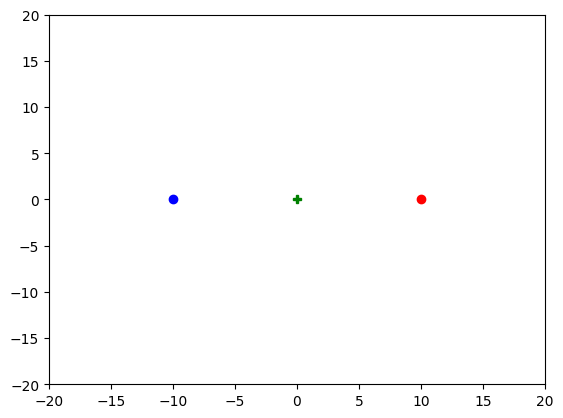

In [ ]:
# create a figure, axis and plot element
fig = plt.figure()
axis = plt.axes(xlim =(-20, 20), ylim =(-20, 20))
mass1, = axis.plot(body1.pos[0], body1.pos[1], 'bo')
mass2, = axis.plot(body2.pos[0], body2.pos[1], 'ro')
com, = axis.plot(COM[0], COM[1], 'gP')

In [ ]:
#energy plotter
def energyPlot():
  time = np.linspace(0, 20, len(PE))
  axis_energy = plt.axes()
  axis_energy.plot(time, PE, 'g-', label='Potential Energy')  # PE line
  axis_energy.plot(time, TE, 'r-', label='Total Energy')      # TE line
  axis_energy.set_xlim(0, 10)
  axis_energy.set_ylim(np.min(PE)-0.2, np.max(TE)+0.2)
  axis_energy.set_title("Energy vs Time")
  axis_energy.set_xlabel("Time (s)")
  axis_energy.set_ylabel("Energy (J)")
  axis_energy.legend()
  axis_energy.grid(True)

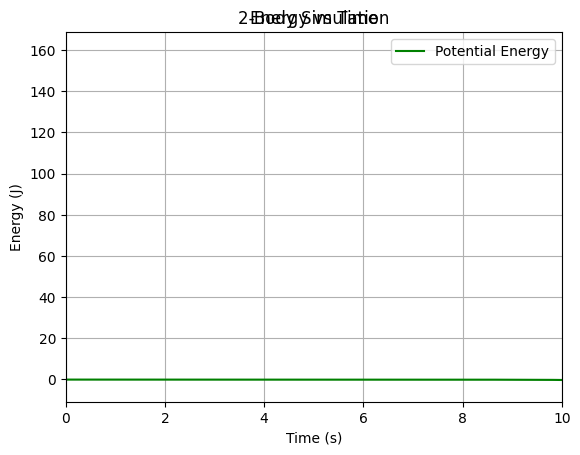

In [ ]:
# initialization function
def init():
  # creating an empty plot/frame
  mass1.set_data([body1.pos[0]], [body1.pos[1]])
  mass2.set_data([body2.pos[0]], [body2.pos[1]])
  return mass1, mass2

#animate function
def animate(i):
    # t is a parameter
    t = i*dt

    dist_vec = body1.pos - body2.pos
    r = magnitude(dist_vec)
    f12 = calcForce(dist_vec)
    f21 = -f12

    body1.updateAcc(f12)
    body2.updateAcc(f21)

    body1.updateVel()
    body2.updateVel()

    body1.updatePos()
    body2.updatePos()

    # set positions of the two masses
    mass1.set_data([body1.pos[0]], [body1.pos[1]])
    mass2.set_data([body2.pos[0]], [body2.pos[1]])
    COM = getCOM()
    com.set_data([COM[0]], [COM[1]])

    #energy
    PE.append(getPE(r))
    KE1 = body1.getKE()
    KE2 = body2.getKE()
    totalEnergy=getPE(r)+KE1+KE2
    TE.append(totalEnergy)

    # return mass object
    return mass1, mass2

# setting a title for the plot
plt.title('2-Body Simulation')
# hiding the axis details
plt.axis('off')

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=False)

# save the animation as mp4 video file
anim.save('twobodysim.mp4', writer = 'ffmpeg', fps = 100)

energyPlot()
plt.show()